In [2]:
#Import all libraries
import numpy as np
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
import urllib.request
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [3]:
#Load in the dataset
pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [4]:
pbp.shape

(49458, 390)

In [5]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,,,0.0,0.0,NaN,NaN,None,None,None,None
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11.0,11.0,NaN,NaN,None,None,None,None
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11.0,11.0,NaN,NaN,None,None,None,None
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,4.53,2.169,False,HITCH,ZONE_COVERAGE,COVER_3
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11.0,11.0,NaN,NaN,None,None,None,None


In [6]:
pbp.tail()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type
49453,4160.0,2023_21_KC_BAL,2024012800,BAL,KC,POST,21,KC,away,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49454,4192.0,2023_21_KC_BAL,2024012800,BAL,KC,POST,21,KC,away,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49455,4221.0,2023_21_KC_BAL,2024012800,BAL,KC,POST,21,KC,away,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49456,4243.0,2023_21_KC_BAL,2024012800,BAL,KC,POST,21,KC,away,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49457,4265.0,2023_21_KC_BAL,2024012800,BAL,KC,POST,21,KC,away,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#nfl.see_weekly_cols()

In [8]:
# nfl.see_pbp_cols()

In [9]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_players', 'defense_players', 'n_offense', 'n_defense',
       'ngs_air_yards', 'time_to_throw', 'was_pressure', 'route',
       'defense_man_zone_type', 'defense_coverage_type'],
      dtype='object', length=390)

In [10]:
pbp.dtypes

play_id                  float32
game_id                   object
old_game_id               object
home_team                 object
away_team                 object
                          ...   
time_to_throw            float32
was_pressure              object
route                     object
defense_man_zone_type     object
defense_coverage_type     object
Length: 390, dtype: object

In [11]:
#Filter to include the pass and rush data and drop 
pbp_RP = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_RP = pbp_RP.dropna(subset = ['epa', 'posteam', 'defteam'])

In [12]:
pd.set_option('display.max_columns', None)
pbp_RP

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [13]:
pbp_RP.shape

(36900, 390)

In [14]:
#Group together the team and pass epa data into a new table
pass_epa = pbp_RP[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending = False)

C:\Users\ayomi\AppData\Local\Temp\ipykernel_31208\1391991422.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pass_epa = pbp_RP[(pbp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})


,posteam,pass_epa
28,SF,0.290798
8,DAL,0.214838
11,GB,0.186362
3,BUF,0.163493
19,MIA,0.134578
10,DET,0.124473
29,TB,0.117349
15,KC,0.112264
16,LA,0.107296
2,BAL,0.098038


In [15]:
#Group together the team and rush epa data into a new table
rush_epa = pbp_RP[(pbp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa.sort_values('rush_epa', ascending = False)

C:\Users\ayomi\AppData\Local\Temp\ipykernel_31208\2734723719.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rush_epa = pbp_RP[(pbp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})


,posteam,rush_epa
28,SF,0.042778
2,BAL,0.019594
3,BUF,0.018618
10,DET,-0.001786
19,MIA,-0.011835
0,ARI,-0.013017
25,PHI,-0.016331
16,LA,-0.024617
5,CHI,-0.042578
8,DAL,-0.048478


In [16]:
#Merge both pass and rush epa tables
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa

,posteam,pass_epa,rush_epa
0,ARI,-0.087735,-0.013017
1,ATL,-0.023836,-0.172797
2,BAL,0.098038,0.019594
3,BUF,0.163493,0.018618
4,CAR,-0.161010,-0.149338
5,CHI,-0.061106,-0.042578
6,CIN,0.051392,-0.102922
7,CLE,-0.144391,-0.117261
8,DAL,0.214838,-0.048478
9,DEN,-0.002799,-0.108540


In [17]:
#Import the team abbreviations and logo from the nfl_data_py library 
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [18]:
#Create a list for both the logo path and the team abbreviations
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
    os.makedirs("logos")

#Create a loop to retrieve all team abbreviations and logo path in .tif image format and append them into the list earlier create     
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

In [19]:
logo_data.head()

,team_abbr,logo_path
0,ARI,logos/ARI.tif
1,ATL,logos/ATL.tif
2,BAL,logos/BAL.tif
3,BUF,logos/BUF.tif
4,CAR,logos/CAR.tif


In [20]:
#Merge the pass and rush epa table with the team abbreviation and logo path table
epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')
epa_with_logos

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.087735,-0.013017,ARI,logos/ARI.tif
1,ATL,-0.023836,-0.172797,ATL,logos/ATL.tif
2,BAL,0.098038,0.019594,BAL,logos/BAL.tif
3,BUF,0.163493,0.018618,BUF,logos/BUF.tif
4,CAR,-0.161010,-0.149338,CAR,logos/CAR.tif
5,CHI,-0.061106,-0.042578,CHI,logos/CHI.tif
6,CIN,0.051392,-0.102922,CIN,logos/CIN.tif
7,CLE,-0.144391,-0.117261,CLE,logos/CLE.tif
8,DAL,0.214838,-0.048478,DAL,logos/DAL.tif
9,DEN,-0.002799,-0.108540,DEN,logos/DEN.tif


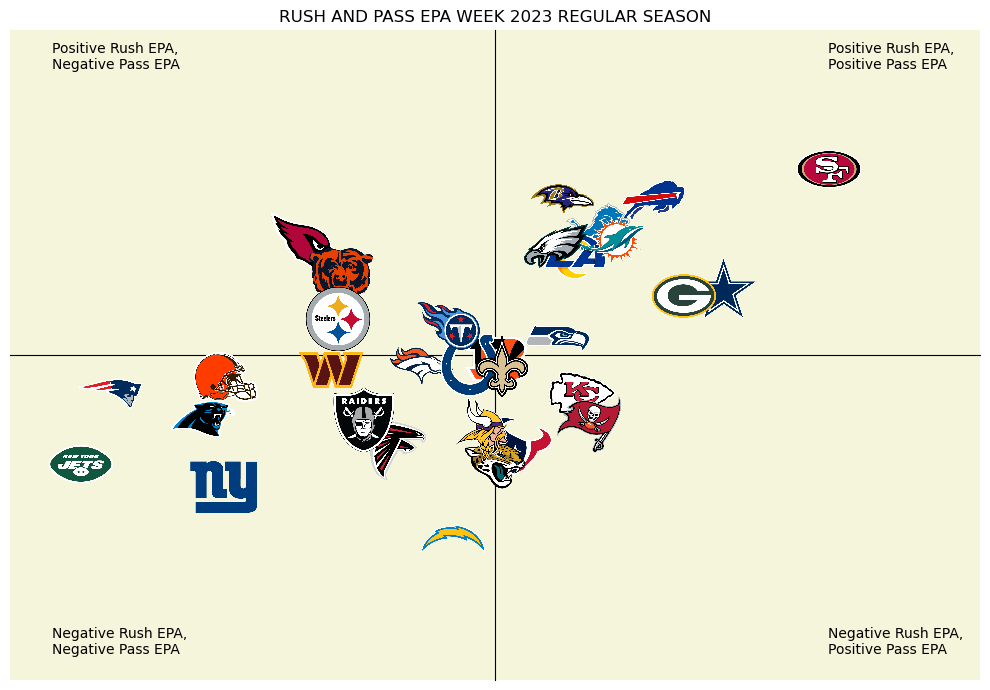

In [36]:
#Use the team logos to plot the pass and rush epa
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format = 'tif'), zoom = .1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon= False)
    ax.add_artist(ab)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.annotate('Positive Rush EPA,\nPositive Pass EPA', (0.29,0.12),fontsize = 10)
plt.annotate('Positive Rush EPA,\nNegative Pass EPA', (-0.27,0.12),fontsize = 10)
plt.annotate('Negative Rush EPA,\nPositive Pass EPA', (0.29,-0.33),fontsize = 10)
plt.annotate('Negative Rush EPA,\nNegative Pass EPA', (-0.27,-0.33),fontsize = 10)
ax.set_facecolor("#F5F5DC")
plt.xlim((-0.3,0.4))
plt.ylim((-0.35,0.15))
plt.title("RUSH AND PASS EPA WEEK 2023 REGULAR SEASON")
plt.xticks([])
plt.yticks([])
plt.savefig("EPA_1-17.png", dpi = 1500)
plt.show()